In [17]:
import pandas as pd 
import scipy.stats as stats
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('Source Data/T Test Data.csv')
df.head(3)

,Sample Number,File Name,Column Count,Paragraph Count,Detection Score Model 1,Final Score Model 1,Detection Score Model 2,Final Score Model 2
0,1,Sample 1.pdf,2,8,0,0.0,4,0.500000
1,2,Sample 2.pdf,2,7,0,0.0,1,0.142857
2,3,Sample 3.pdf,1,7,7,1.0,7,1.000000


In [4]:
df_1 = df[df['Column Count'] == 1]
df_2 = df[df['Column Count'] == 2]
df_1.shape

(30, 8)

In [5]:
# Test the whole population
stats.ttest_rel(df['Detection Score Model 1'], df['Detection Score Model 2'])

TtestResult(statistic=-3.3757115652005245, pvalue=0.001307262812992873, df=59)

In [6]:
# Test the single column documents
stats.ttest_rel(df_1['Detection Score Model 1'], df_1['Detection Score Model 2'])

TtestResult(statistic=0.4411698907260347, pvalue=0.6623617732700398, df=29)

In [7]:
# Test the two column documents
stats.ttest_rel(df_2['Detection Score Model 1'], df_2['Detection Score Model 2'])

TtestResult(statistic=-3.845141396561453, pvalue=0.0006081700961120126, df=29)

In [8]:
  #visuals
df_tot = pd.read_csv('Source Data/T Test Visualizations.csv')
df_tot.head(3)

,File Name,Column Count,Paragraph Count,Detection Score,Final Score,Model
0,Sample 1.pdf,2,8,0,0.0,Model T1
1,Sample 2.pdf,2,7,0,0.0,Model T1
2,Sample 3.pdf,1,7,7,1.0,Model T1


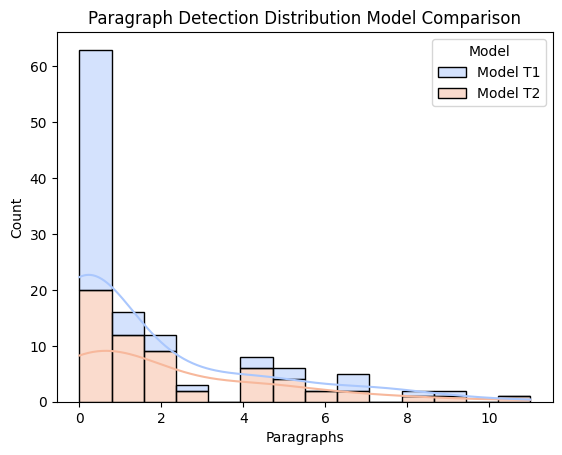

In [13]:
#visuals
ax = sns.histplot(data = df_tot, x='Detection Score', hue = 'Model', multiple="stack", kde=True, palette=sns.color_palette('coolwarm', n_colors=2))
ax.set(title = 'Paragraph Detection Distribution Model Comparison', xlabel='Paragraphs');

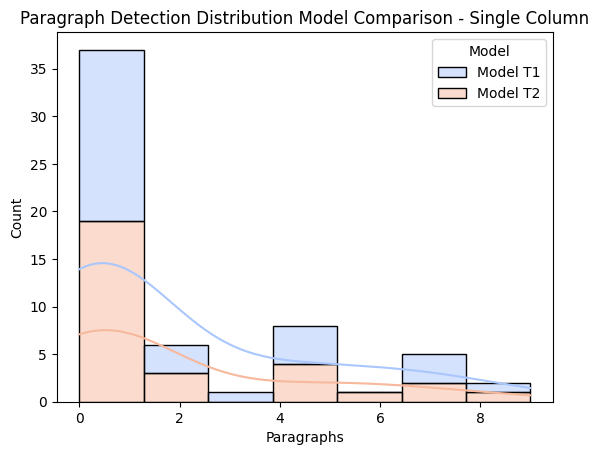

In [14]:
df_tot_1 = df_tot[df_tot['Column Count'] == 1]
ax = sns.histplot(data = df_tot_1, x='Detection Score', hue = 'Model', multiple="stack", kde=True, palette=sns.color_palette('coolwarm', n_colors=2))
ax.set(title = 'Paragraph Detection Distribution Model Comparison - Single Column', xlabel='Paragraphs');

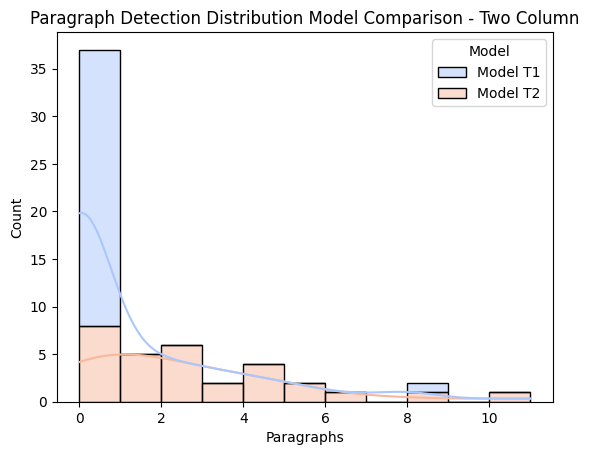

In [16]:
df_tot_2 = df_tot[df_tot['Column Count'] == 2]
ax = sns.histplot(data = df_tot_2, x='Detection Score', hue = 'Model', multiple="stack", kde=True, palette=sns.color_palette('coolwarm', n_colors=2))
ax.set(title = 'Paragraph Detection Distribution Model Comparison - Two Column', xlabel='Paragraphs');

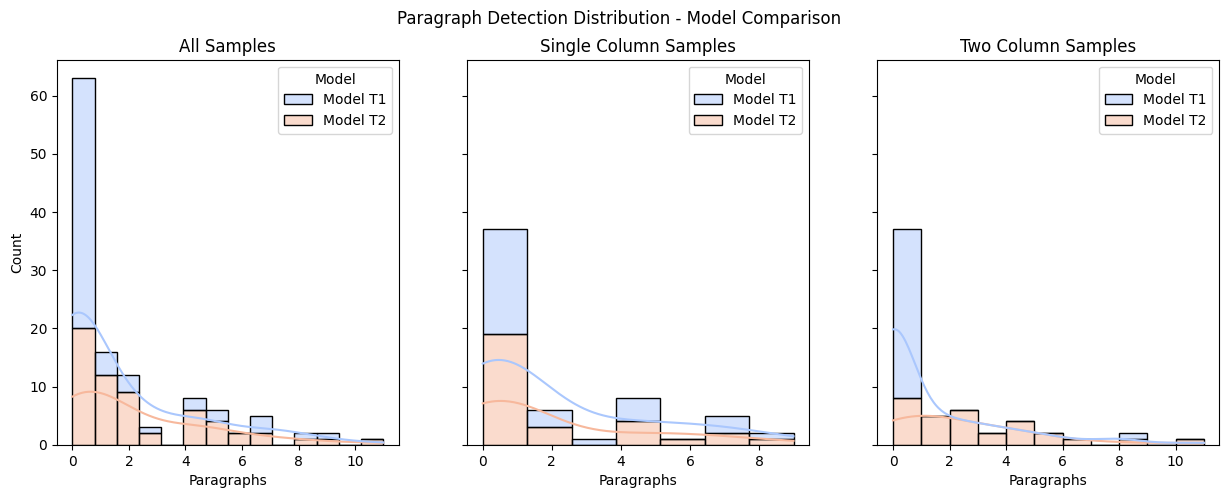

In [24]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig.suptitle('Paragraph Detection Distribution - Model Comparison')

#Total
ax = sns.histplot(ax = axes[0], data = df_tot, x='Detection Score', hue = 'Model', multiple="stack", kde=True, palette=sns.color_palette('coolwarm', n_colors=2))
ax.set(title = 'All Samples', xlabel='Paragraphs');

#Single Column
ax = sns.histplot(ax = axes[1], data = df_tot_1, x='Detection Score', hue = 'Model', multiple="stack", kde=True, palette=sns.color_palette('coolwarm', n_colors=2))
ax.set(title = 'Single Column Samples', xlabel='Paragraphs');

#Multi Column
ax = sns.histplot(ax = axes[2], data = df_tot_2, x='Detection Score', hue = 'Model', multiple="stack", kde=True, palette=sns.color_palette('coolwarm', n_colors=2))
ax.set(title = 'Two Column Samples', xlabel='Paragraphs');